In [229]:
# Loading libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [230]:
# OpenCV version
cv2.__version__

'4.5.4'

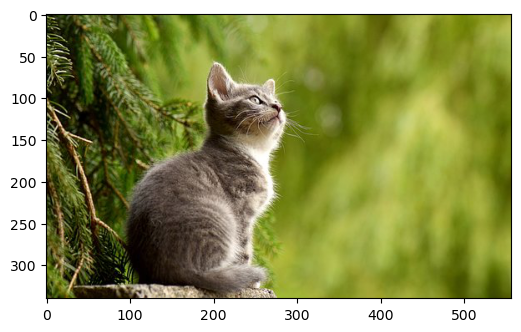

In [231]:
# Showing Original Image
plt.figure(figsize=(6,8))
image = plt.imread('../input/cat-image/cat-2083492__340.jpg')
plt.imshow(image)
# Display all open figures.
plt.show()

In [232]:
# Image dimensions
print(f"image shape: {image.shape}")
print("image Height = {}, width = {}, color channel = {}".format(image.shape[0], image.shape[1], image.shape[2]))
print("image size: {}".format(image.size))

image shape: (340, 557, 3)
image Height = 340, width = 557, color channel = 3
image size: 568140


When the image file is read with the OpenCV function **imread()**, the order of colors is **BGR** (blue, green, red). On the other hand, in **Pillow**, the order of colors is assumed to be **RGB** (red, green, blue).

Therefore, if want to use both the Pillow function and the OpenCV function, need to convert BGR and RGB.

You can use the OpenCV function cvtColor() or simply change the order of ndarray.

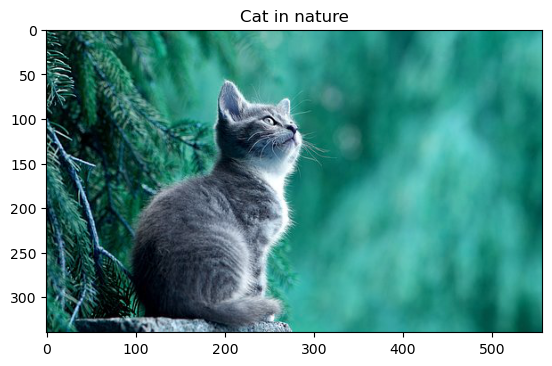

In [233]:
# Function to show images with title
def catImageShow(img, title):
#     color code conversion
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)

catImageShow(image, "Cat in nature")

In [234]:
# Mask with image shape
mask = np.zeros(image.shape[:2], dtype="uint8")
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [235]:
# Types of mask
mask_test = mask.copy()
cv2.rectangle(mask_test,(0,50),(45,100),255, -1)
cv2.line(mask_test,(0,50),(45,100),0)
cv2.circle(mask_test,(278,170),140,255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

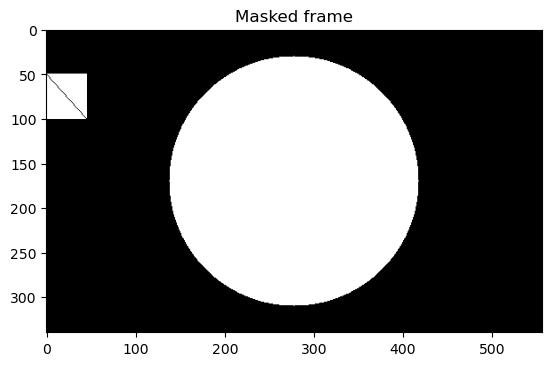

In [236]:
# Mask frame
catImageShow(mask_test, "Masked frame")

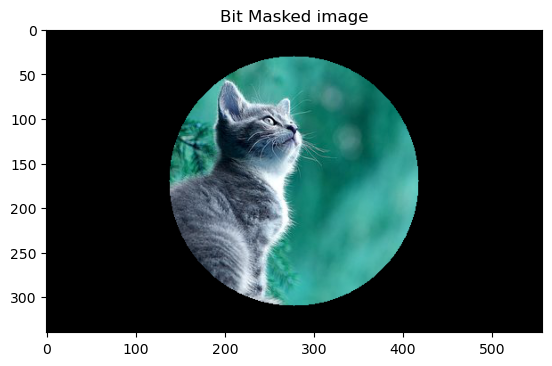

In [237]:
cv2.circle(mask,(278,170),140,255, -1)
bit_mask = cv2.bitwise_and(image,image,mask=mask)
catImageShow(bit_mask,"Bit Masked image")

In [238]:
# Image scalling
image/255

array([[[0.10980392, 0.18431373, 0.        ],
        [0.18823529, 0.25882353, 0.0627451 ],
        [0.16078431, 0.22352941, 0.04705882],
        ...,
        [0.62352941, 0.63921569, 0.20784314],
        [0.62745098, 0.64313725, 0.21176471],
        [0.62352941, 0.63921569, 0.20784314]],

       [[0.05490196, 0.12156863, 0.        ],
        [0.03137255, 0.09411765, 0.        ],
        [0.04313725, 0.09411765, 0.        ],
        ...,
        [0.62745098, 0.64313725, 0.21176471],
        [0.63137255, 0.64705882, 0.21568627],
        [0.63137255, 0.64705882, 0.21568627]],

       [[0.58823529, 0.64705882, 0.51764706],
        [0.41960784, 0.47058824, 0.35294118],
        [0.15686275, 0.19607843, 0.09803922],
        ...,
        [0.63921569, 0.65490196, 0.22352941],
        [0.64313725, 0.65882353, 0.22745098],
        [0.64313725, 0.65882353, 0.22745098]],

       ...,

       [[0.10980392, 0.20392157, 0.01568627],
        [0.18039216, 0.2745098 , 0.03137255],
        [0.29803922, 0

### Image reshape

In [239]:
# Custom shape
customW = 120/image.shape[1]
newDim = (120, int(image.shape[0] * customW))
customW, newDim

(0.21543985637342908, (120, 73))

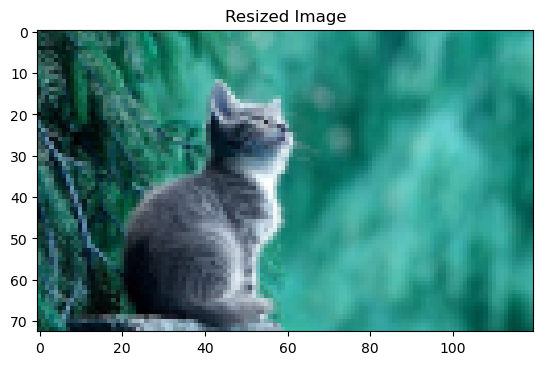

In [240]:
# Image in custom shape
newImage = cv2.resize(image,newDim, interpolation= cv2.INTER_AREA)
catImageShow(newImage, "Resized Image")

In [241]:
newImage.shape

(73, 120, 3)

### Rotation

In [242]:
# Original image shape
imageH,imageW = image.shape[:2]
imageH,imageW

(340, 557)

In [243]:
# Center point of image
center = (imageW//2, imageH//2)
center

(278, 170)

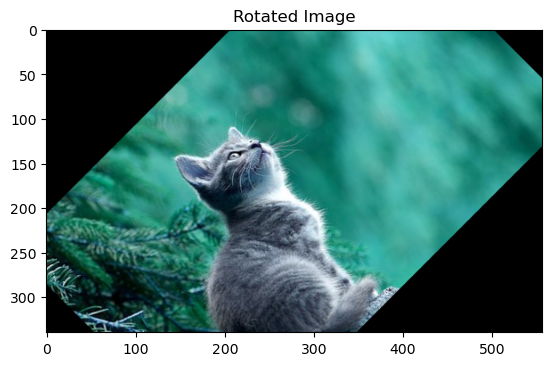

In [244]:
# Rotation in 45 degree
imageRotate = cv2.getRotationMatrix2D(center,45,1)
# apply transformation to image
rotateNow = cv2.warpAffine(image,imageRotate,(imageW,imageH))
catImageShow(rotateNow,"Rotated Image")

## Gradient filters

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian

### Sobel Derivatives

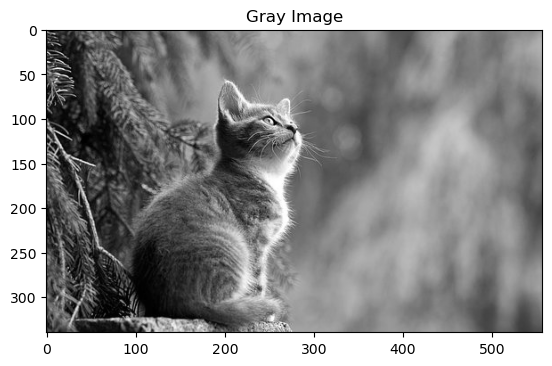

In [245]:
grayImg = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
catImageShow(grayImg,"Gray Image") 

In [246]:
grayImg.shape

(340, 557)

In [247]:
argumentImage = {
    "image":"../input/cat-image/cat-2083492__340.jpg",
    "scharr":0
}

In [248]:
kernelGen = -1 if argumentImage["scharr"]>0 else 3

Image derivatives are highly used in detecting the edges of the image. Image derivatives locate the places in the image where the pixel intensity changes in a drastic manner. <br/>
Sobel operator is one of the available techniques to extract the derivative of an image. It is a combination of Gaussian Smoothing and differentiation,so it is more resistant to noise

In [249]:
gradientImageDataX = cv2.Sobel(grayImg, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=kernelGen)
gradientImageDataX

array([[   0.,   12.,    6., ...,   12.,    2.,    0.],
       [   0., -112.,  -67., ...,   13.,    3.,    0.],
       [   0., -210., -240., ...,   15.,    5.,    0.],
       ...,
       [   0.,  165.,   70., ...,   10.,   10.,    0.],
       [   0.,  192.,  106., ...,    9.,    9.,    0.],
       [   0.,  194.,  112., ...,    8.,    8.,    0.]], dtype=float32)

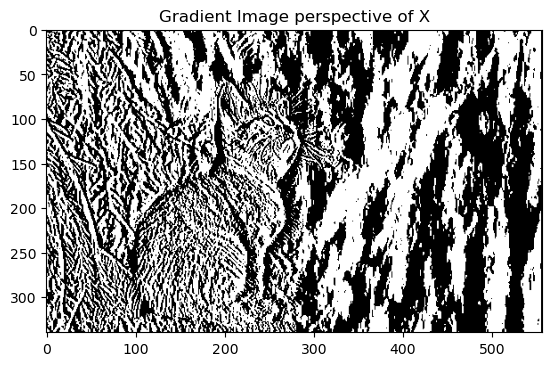

In [250]:
catImageShow(gradientImageDataX, "Gradient Image perspective of X")

In [251]:
gradientImageDataY = cv2.Sobel(grayImg, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=kernelGen)
gradientImageDataY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [358., 234.,  37., ...,  15.,  17.,  18.],
       [588., 614., 540., ...,  21.,  23.,  24.],
       ...,
       [-46., -21.,  34., ...,  -8.,  -8.,  -8.],
       [-28., -26., -18., ...,  -9., -11., -12.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

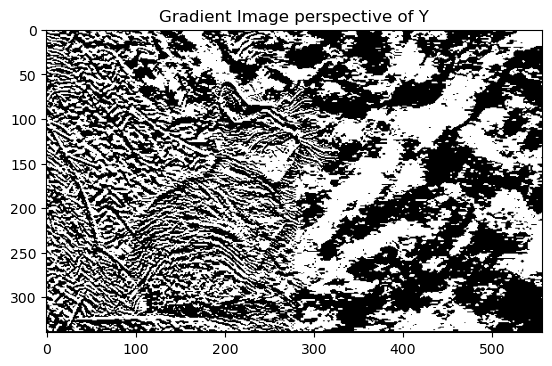

In [252]:
catImageShow(gradientImageDataY, "Gradient Image perspective of Y")

### Laplacian Derivatives

In [262]:
laplacian = cv2.Laplacian(image,cv2.CV_32F)
laplacian

array([[[  12.,    6.,   32.],
        [-107., -112.,  -52.],
        [ -65.,  -73.,  -29.],
        ...,
        [   1.,    1.,    1.],
        [   0.,    0.,    0.],
        [   6.,    6.,    6.]],

       [[ 138.,  136.,  132.],
        [ 148.,  145.,  106.],
        [  82.,   82.,   60.],
        ...,
        [   1.,    1.,    1.],
        [   1.,    1.,    1.],
        [   1.,    1.,    1.]],

       [[-227., -230., -225.],
        [ -55.,  -51.,  -52.],
        [ 141.,  148.,  130.],
        ...,
        [  -3.,   -3.,   -3.],
        [  -1.,   -1.,   -1.],
        [   0.,    0.,    0.]],

       ...,

       [[  35.,   35.,   12.],
        [   9.,    5.,    9.],
        [ -38.,  -43.,  -27.],
        ...,
        [   0.,    1.,    1.],
        [  -2.,   -3.,   -1.],
        [  -4.,   -4.,   -8.]],

       [[  54.,   54.,   10.],
        [  17.,   13.,   22.],
        [ -38.,  -43.,  -27.],
        ...,
        [  -1.,    0.,    0.],
        [   2.,    1.,    3.],
        [  -1.,

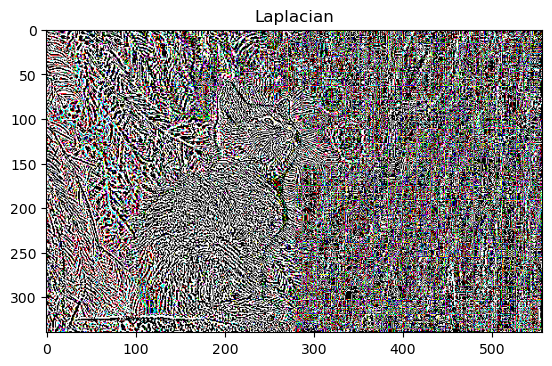

In [263]:
catImageShow(laplacian,"Laplacian")

#### Comparison

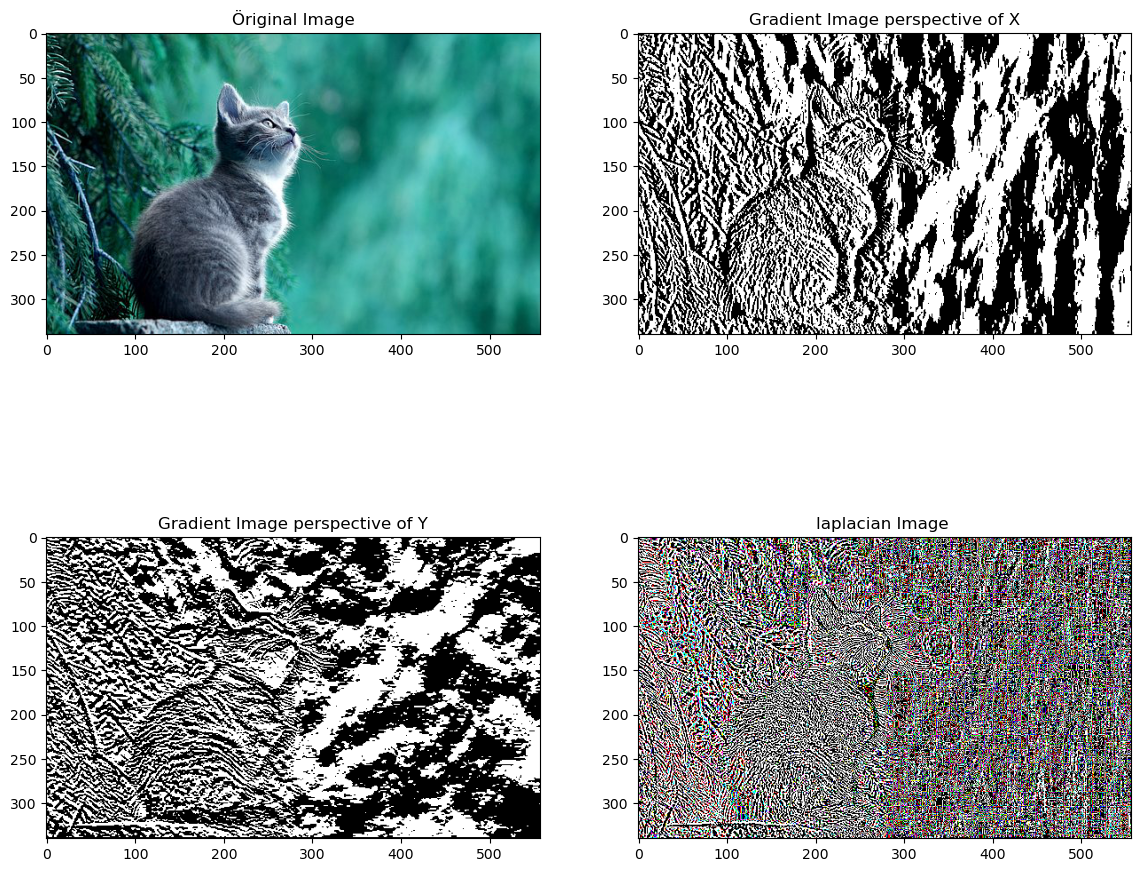

In [264]:
plt.figure(figsize=(14,12))

plt.subplot(2, 2, 1)
catImageShow(image,"Öriginal Image")

plt.subplot(2, 2, 2)
catImageShow(gradientImageDataX, "Gradient Image perspective of X")

plt.subplot(2, 2, 3)
catImageShow(gradientImageDataY, "Gradient Image perspective of Y")

plt.subplot(2, 2, 4)
catImageShow(laplacian, "laplacian Image ")

plt.show()